In [346]:
!pip install hvplot



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [347]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn import linear_model

In [348]:
dweather_df=pd.read_csv('https://noaadata.s3.amazonaws.com/ny_two.csv')
dweather_df=dweather_df[['date','ASLP', 'ASTP', 'CLDD', 'DP1X', 'DYHF','DYTS']]
dweather_df.head()

,date,ASLP,ASTP,CLDD,DP1X,DYHF,DYTS
0,2010-01-01,1014.7,1013.8,0,0,1.0,NaN
1,2010-02-01,1008.2,1007.4,0,3,3.0,NaN
2,2010-03-01,1011.6,1010.7,0,4,1.0,NaN
3,2010-04-01,1012.9,1012.0,4,1,2.0,NaN
4,2010-05-01,1016.0,1015.0,67,0,2.0,NaN


In [349]:
dweather_df.isnull().sum()

date      0
ASLP      5
ASTP      5
CLDD      0
DP1X      0
DYHF     57
DYTS    118
dtype: int64

In [350]:
dweather_clean=dweather_df.fillna(0)

In [351]:
dweather_clean.isnull().sum()

date    0
ASLP    0
ASTP    0
CLDD    0
DP1X    0
DYHF    0
DYTS    0
dtype: int64

In [352]:
# Import our input dataset
weather_df = pd.read_csv('https://noaadata.s3.amazonaws.com/ny.csv')
weather_df=weather_df[['date','prcp','tavg','awnd','tmin','tmax']]
weather_df.head()

,date,prcp,tavg,awnd,tmin,tmax
0,2010-01-01,42.5,0.08,6.0,-3.53,3.68
1,2010-02-01,152.9,0.60,6.3,-2.12,3.31
2,2010-03-01,219.2,8.37,6.1,4.15,12.59
3,2010-04-01,85.9,13.00,4.9,8.10,17.90
4,2010-05-01,50.4,17.70,4.6,12.61,22.78


In [353]:
merged_df=pd.merge(weather_df,dweather_clean,on='date', how='left')
merged_df.head()

,date,prcp,tavg,awnd,tmin,tmax,ASLP,ASTP,CLDD,DP1X,DYHF,DYTS
0,2010-01-01,42.5,0.08,6.0,-3.53,3.68,1014.7,1013.8,0,0,1.0,0.0
1,2010-02-01,152.9,0.60,6.3,-2.12,3.31,1008.2,1007.4,0,3,3.0,0.0
2,2010-03-01,219.2,8.37,6.1,4.15,12.59,1011.6,1010.7,0,4,1.0,0.0
3,2010-04-01,85.9,13.00,4.9,8.10,17.90,1012.9,1012.0,4,1,2.0,0.0
4,2010-05-01,50.4,17.70,4.6,12.61,22.78,1016.0,1015.0,67,0,2.0,0.0


In [354]:
# weather_df["DATE"] = pd.to_datetime(weather_df["Date"], format='%b-%y').dt.strftime('%Y-%m')
merged_df["YEAR"] = pd.to_datetime(merged_df["date"]).dt.year
merged_df["MONTH"] = pd.to_datetime(merged_df["date"]).dt.month

In [355]:
merged_df.head(30)


,date,prcp,tavg,awnd,tmin,tmax,ASLP,ASTP,CLDD,DP1X,DYHF,DYTS,YEAR,MONTH
0,2010-01-01,42.5,0.08,6.0,-3.53,3.68,1014.7,1013.8,0,0,1.0,0.0,2010,1
1,2010-02-01,152.9,0.60,6.3,-2.12,3.31,1008.2,1007.4,0,3,3.0,0.0,2010,2
2,2010-03-01,219.2,8.37,6.1,4.15,12.59,1011.6,1010.7,0,4,1.0,0.0,2010,3
3,2010-04-01,85.9,13.00,4.9,8.10,17.90,1012.9,1012.0,4,1,2.0,0.0,2010,4
4,2010-05-01,50.4,17.70,4.6,12.61,22.78,1016.0,1015.0,67,0,2.0,0.0,2010,5
5,2010-06-01,34.5,23.61,4.6,18.65,28.57,1012.5,1011.6,290,0,2.0,0.0,2010,6
6,2010-07-01,62.0,27.07,4.4,22.49,31.65,1014.2,1013.3,488,0,0.0,6.0,2010,7
7,2010-08-01,79.3,24.57,4.2,20.29,28.85,1015.4,1014.5,348,1,0.0,2.0,2010,8
8,2010-09-01,111.3,21.36,5.1,17.13,25.59,1014.8,1014.0,173,1,0.0,5.0,2010,9
9,2010-10-01,112.4,14.71,5.4,10.55,18.86,1012.2,1011.3,1,1,2.0,0.0,2010,10


In [356]:
# merged_df.to_csv('weather_merged.csv',index=False)

In [357]:
merged_df.describe()

,prcp,tavg,awnd,tmin,tmax,ASLP,ASTP,CLDD,DP1X,DYHF,DYTS,YEAR,MONTH
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.00000
mean,93.245513,13.147372,5.081410,9.025897,17.102564,984.266026,983.405128,100.134615,0.923077,1.839744,0.967949,2016.000000,6.50000
std,51.407549,8.765878,0.688318,8.645277,8.918319,179.702853,179.545408,145.129045,1.006677,2.102216,2.275876,3.753708,3.46317
min,8.500000,-4.080000,3.900000,-8.540000,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,1.00000
25%,58.500000,4.655000,4.500000,0.837500,8.405000,1014.800000,1014.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,3.75000
50%,87.600000,13.475000,5.000000,9.110000,17.925000,1016.700000,1015.800000,5.500000,1.000000,1.000000,0.000000,2016.000000,6.50000
75%,116.700000,21.472500,5.600000,17.217500,25.595000,1018.750000,1017.825000,179.500000,1.000000,3.000000,0.000000,2019.000000,9.25000
max,437.900000,27.070000,6.900000,22.490000,31.650000,1024.300000,1022.900000,488.000000,4.000000,9.000000,14.000000,2022.000000,12.00000


In [358]:
merged_df.dtypes

date      object
prcp     float64
tavg     float64
awnd     float64
tmin     float64
tmax     float64
ASLP     float64
ASTP     float64
CLDD       int64
DP1X       int64
DYHF     float64
DYTS     float64
YEAR       int64
MONTH      int64
dtype: object

In [359]:
merged_df.isnull().sum()

date     0
prcp     0
tavg     0
awnd     0
tmin     0
tmax     0
ASLP     0
ASTP     0
CLDD     0
DP1X     0
DYHF     0
DYTS     0
YEAR     0
MONTH    0
dtype: int64

In [360]:
final_df=merged_df.drop(columns=['date','YEAR','MONTH'])
final_df.tail(30)

,prcp,tavg,awnd,tmin,tmax,ASLP,ASTP,CLDD,DP1X,DYHF,DYTS
126,131.1,26.27,4.4,22.33,30.21,1014.0,1013.2,443,2,0.0,11.0
127,71.6,24.59,4.4,20.81,28.37,1014.4,1013.5,349,0,1.0,0.0
128,72.6,20.21,4.4,16.05,24.36,1018.0,1018.3,136,1,0.0,1.0
129,126.5,14.55,4.4,10.83,18.26,1019.5,1018.6,6,3,5.0,0.0
130,118.0,10.50,5.2,5.79,15.20,1021.2,1020.4,0,1,2.0,0.0
131,89.8,3.61,5.9,0.18,7.04,1017.2,1016.0,0,1,1.0,0.0
132,57.9,1.57,5.7,-1.93,5.06,1016.1,1015.1,0,0,1.0,0.0
133,121.3,0.69,5.6,-2.13,3.51,1018.6,1017.6,0,1,5.0,0.0
134,78.3,6.66,5.9,1.82,11.51,1020.8,1020.0,0,0,6.0,0.0
135,68.0,11.08,5.3,6.30,15.86,1012.6,1011.8,0,0,2.0,0.0


CORRELATION OF VARIABLES

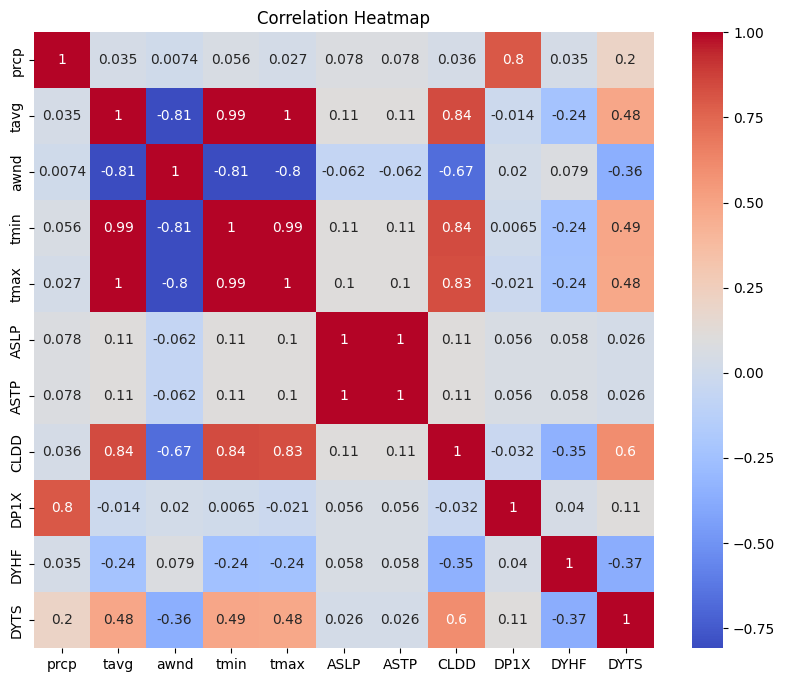

In [361]:
# Create a correlation matrix from the dataframe
correlation_matrix = final_df.corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Set the title
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

LINEAR REGRESSION (PREDICTION MODEL)

In [362]:
# Define X & y variables
y = final_df.prcp.values.reshape(-1,1)
X = final_df.drop('prcp', axis=1)

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.90,random_state=42)



In [363]:
# use linear_model for prediction (selected model)
#Fit model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [364]:
# Predict
y_predict=regr.predict(X_test)
y_predict2= np.squeeze(y_predict).tolist()
print(y_predict2)

[142.67715576473802, 128.46883703757555, 128.9327156507805, 87.98637373394345, 100.95202224914028, 166.32087616160095, 62.156977549454254, 60.43300612543104, 57.293266235528726, 133.5716958864036, 204.62913511180398, 64.9772493508525, 104.09391724517637, 57.15350707843301, 60.05775611470885, 60.23040696219455]


In [365]:
# #Identify x_train dataset
# #Convert from multi array to list
# X_train2 = np.squeeze(X_train).tolist()
# print(X_train2)

In [366]:
#Identify y_train dataset
#Convert from multi array to list
y_train2 = np.squeeze(y_train).tolist()
print(y_train2)

[101.8, 119.0, 47.1, 153.9, 103.6, 68.7, 90.4, 112.4, 102.3, 198.2, 92.3, 107.5, 177.3, 83.9, 8.5, 78.6, 36.3, 149.8, 83.6, 72.6, 71.6, 58.7, 57.6, 28.7, 78.3, 16.0, 89.8, 60.8, 31.4, 82.4, 68.0, 103.5, 79.4, 135.0, 92.3, 34.0, 75.4, 46.6, 118.0, 202.1, 50.4, 103.0, 147.3, 95.6, 126.7, 80.2, 110.3, 49.5, 135.6, 82.5, 42.5, 137.1, 11.7, 48.9, 84.6, 180.1, 102.5, 171.7, 32.0, 79.3, 171.7, 45.4, 40.1, 111.1, 21.7, 17.0, 114.4, 80.3, 59.9, 102.9, 56.6, 43.4, 78.2, 123.9, 61.7, 150.6, 66.3, 34.5, 114.0, 131.1, 116.7, 125.4, 73.0, 41.0, 39.6, 64.6, 79.3, 69.4, 30.5, 28.1, 55.9, 77.7, 115.6, 110.9, 118.3, 111.3, 81.1, 178.9, 121.3, 85.9, 53.2, 59.0, 116.7, 114.8, 62.0, 39.9, 120.6, 219.2, 49.2, 40.9, 38.9, 122.9, 100.7, 108.2, 142.5, 113.8, 76.5, 106.7, 111.9, 93.8, 28.0, 126.5, 69.5, 66.6, 152.9, 91.6, 118.0, 84.6, 98.5, 203.9, 148.2, 35.4, 86.7, 80.6, 107.1, 121.7, 90.5, 115.7, 106.9, 152.2]


In [367]:
#convert X_test to DataFrame
y_train3=pd.DataFrame({'y_train':y_train2})
y_train3.head()

,y_train
0,101.8
1,119.0
2,47.1
3,153.9
4,103.6


In [368]:
#Identify y_test dataset
#Convert from multi array to list
y_test2 = np.squeeze(y_test).tolist()
print(y_test2)

[129.3, 106.7, 88.5, 94.4, 119.0, 174.7, 41.9, 57.9, 45.9, 187.4, 437.9, 63.6, 109.3, 80.4, 55.6, 39.1]


In [369]:
len(y_predict)

16

In [370]:
#Print array for Y_test & y_predict
for i in range(0,16):
  print(f"{y_test[i]}  {y_predict[i]}")

[129.3]  [142.67715576]
[106.7]  [128.46883704]
[88.5]  [128.93271565]
[94.4]  [87.98637373]
[119.]  [100.95202225]
[174.7]  [166.32087616]
[41.9]  [62.15697755]
[57.9]  [60.43300613]
[45.9]  [57.29326624]
[187.4]  [133.57169589]
[437.9]  [204.62913511]
[63.6]  [64.97724935]
[109.3]  [104.09391725]
[80.4]  [57.15350708]
[55.6]  [60.05775611]
[39.1]  [60.23040696]


In [371]:
#convert y_test to DataFrame
y_test3=pd.DataFrame({'y_test':y_test2})
y_test3.head(5)

,y_test
0,129.3
1,106.7
2,88.5
3,94.4
4,119.0


In [372]:
#convert y_predict to DataFrame
y_predict3=pd.DataFrame({'Prediction':y_predict2})
y_predict3.head(5)

,Prediction
0,142.677156
1,128.468837
2,128.932716
3,87.986374
4,100.952022


In [373]:
#Merge y_test & y_predict DataFrames 

test_predict = pd.merge(y_test3, y_predict3, left_index=True, right_index=True)
test_predict.head()

,y_test,Prediction
0,129.3,142.677156
1,106.7,128.468837
2,88.5,128.932716
3,94.4,87.986374
4,119.0,100.952022


In [374]:
test_predict.index

RangeIndex(start=0, stop=16, step=1)

LINEAR MODEL ANALYSIS

In [375]:
x_axis = test_predict.index
test=test_predict['y_test']
prediction=test_predict['Prediction']

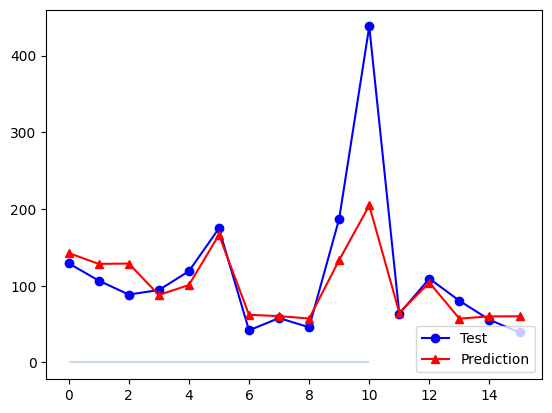

In [376]:
# Assign plots to tuples that stores result of plot

# Each point on the sine chart is marked by a blue circle
y_test_handle, = plt.plot(x_axis, test, marker ='o', color='blue', label="Test")
# Each point on the cosine chart is marked by a red triangle
y_predict_handle, = plt.plot(x_axis, prediction, marker='^', color='red', label="Prediction")
plt.hlines(0, 0, 10, alpha=0.25)
plt.legend(loc="lower right")

In [377]:
# Test  mean squared error
mse=mean_squared_error(y_test, y_predict)
print(f" MSE - Mean Squared error for linear_model is: {mse}")

 MSE - Mean Squared error for linear_model is: 3851.2390384534388


In [378]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
print("The accuracy of our model is {}%".format(round(score, 2)*100))

The accuracy of our model is 56.00000000000001%


INPUT VARIABLES FOR PREDICTION

In [379]:

tavg_sel = float(input("Average Temperature (F): "))
awnd_sel = float(input("Average windpeed (miles/hr): "))
tmin_sel = float(input("Minimum Temperature (F): "))
tmax_sel = float(input("Maximum Temperature (F): "))
ASLP_sel = float(input("Average Sea Level Pressure(mb) e.g 1014: "))
ASTP_sel = float(input("Average Station Level Pressure(mb) e.g 1014: "))
CLDD_sel = float(input("# of days more than 65(F) / 18.3(C) : "))
DP1X_sel = float(input("# of days with heavy precipitation : "))
DYHF_sel = float(input("# of days with heavy fog : "))
DYTS_sel = float(input("# of days with thunderstorm : "))



prediction_prcp=regr.predict([[	tavg_sel,	awnd_sel,	tmin_sel,	tmax_sel,	ASLP_sel,	ASTP_sel,	CLDD_sel,	DP1X_sel,	DYHF_sel,	DYTS_sel]])
print(f"Predicted Total Precipitation for the month (Inches):{prediction_prcp}")



Average Temperature (F): 65
Average windpeed (miles/hr): 35
Minimum Temperature (F): 45
Maximum Temperature (F): 140
Average Sea Level Pressure(mb) e.g 1014: 940
Average Station Level Pressure(mb) e.g 1014: 1000
# of days more than 65(F) / 18.3(C) : 5
# of days with heavy precipitation : 4
# of days with heavy fog : 7
# of days with thunderstorm : 3
Predicted Total Precipitation for the month (Inches):[[626.7126499]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


OTHER MODEL TRIALS

In [380]:
# Define X & y variables
y = final_df.prcp.values.reshape(-1,1)
X = final_df.drop(columns='prcp')



In [381]:
# Get dummies for X variable
X = pd.get_dummies(X)
X.head()

,tavg,awnd,tmin,tmax,ASLP,ASTP,CLDD,DP1X,DYHF,DYTS
0,0.08,6.0,-3.53,3.68,1014.7,1013.8,0,0,1.0,0.0
1,0.60,6.3,-2.12,3.31,1008.2,1007.4,0,3,3.0,0.0
2,8.37,6.1,4.15,12.59,1011.6,1010.7,0,4,1.0,0.0
3,13.00,4.9,8.10,17.90,1012.9,1012.0,4,1,2.0,0.0
4,17.70,4.6,12.61,22.78,1016.0,1015.0,67,0,2.0,0.0


In [382]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75,random_state=42)

In [383]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)
y_train_scaled = y_scaler.transform(y_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test)

In [384]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

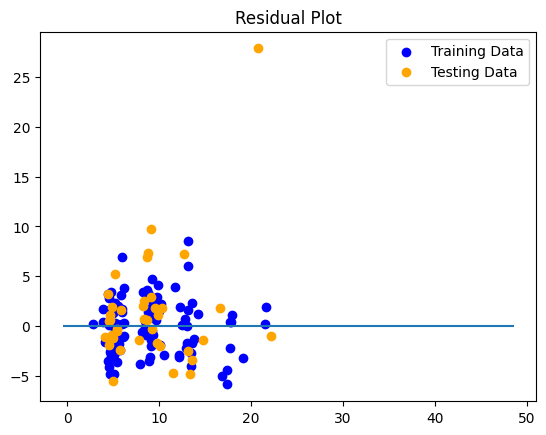

In [385]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [386]:
y_pred=model.predict(X_test_scaled)

In [387]:
# Mean Squared Model
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 31.238716957262998, R2: -1.7342249969205201


In [388]:
# Lasso Model
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE_1 = mean_squared_error(y_test_scaled, predictions)
r2_1 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE_1}, R2: {r2_1}")

MSE: 30.504989253328514, R2: 0.5154560169388962


In [389]:
# Ridge Model
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE_2 = mean_squared_error(y_test_scaled, predictions)
r2_2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE_2}, R2: {r2_2}")

MSE: 30.466392379108292, R2: 0.5160690931479408


In [390]:
# ElasticNet Model
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE_3 = mean_squared_error(y_test_scaled, predictions)
r2_3 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE_3}, R2: {r2_3}")

MSE: 30.480946703883628, R2: 0.5158379109488965


NEURAL NETWORKS (NOT APPLICABLE)

In [391]:
# Tensorflow Neural Networks
prcp_model = tf.keras.models.Sequential()
prcp_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=10))
prcp_model.add(tf.keras.layers.Dense(units=50, activation="relu"))
prcp_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
prcp_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = prcp_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = prcp_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: -16.8636 - accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: -29.1459 - accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: -41.6966 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: -54.0682 - accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: -67.8741 - accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: -81.3227 - accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: -96.4748 - accuracy: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: -112.4016 - accuracy: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: -130.3056 - accuracy: 0.0000e+00
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss:

2/2 - 0s - loss: -9.1796e+04 - accuracy: 0.0000e+00 - 191ms/epoch - 96ms/step
Loss: -91795.5859375, Accuracy: 0.0
